## 필수과제1 (타이타닉데이터셋)
- VarianceThreshold -타이타닉 데이터 feature_selection
    - 임계값 기준을 몇으로 했는지?
    - 그 기준의 이유
    - 어떤 식으로 찾았는지!
- 어떤 피처가 선택이 되었나?

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [2]:
## 타이타닉 데이터셋 불러오기

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
## 컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
## 결측치 확인

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
## 결측치 처리

df['age'].fillna(df['age'].median(), inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df = df.drop('deck', axis=1)
df

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_39152\1858857522.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_39152\1858857522.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

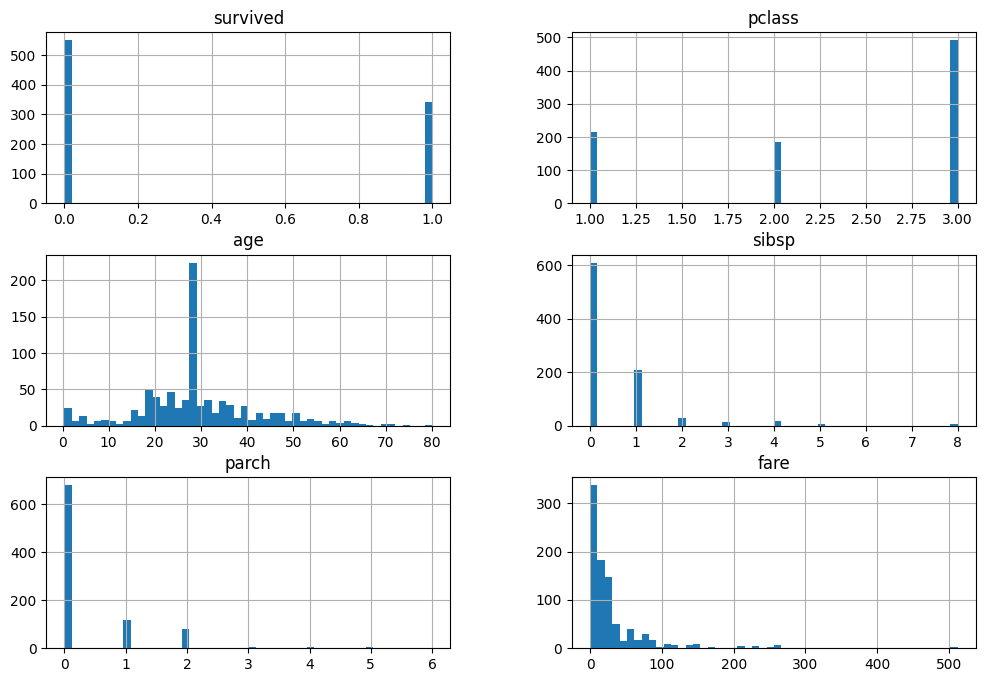

In [6]:
df.hist(bins=50, figsize=(12, 8))

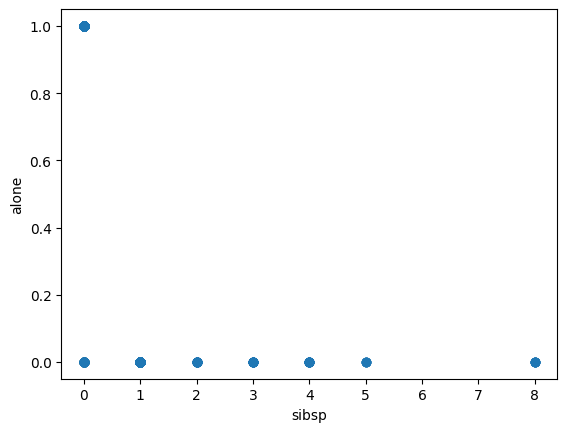

In [7]:
# sibsp와 alone의 관계
plt.scatter(df['sibsp'], df['alone'])
plt.xlabel('sibsp')
plt.ylabel('alone')

plt.show()

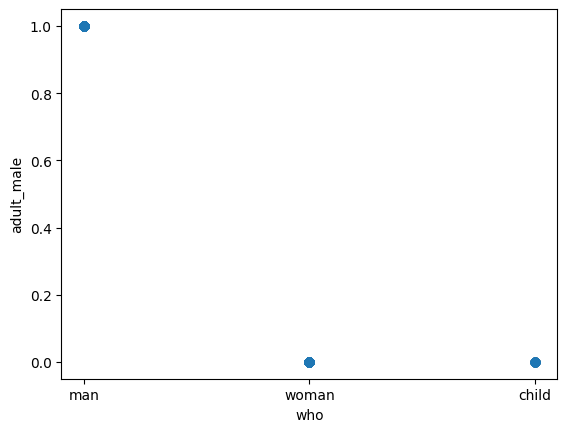

In [8]:
# who와 adult_male의 관계
plt.scatter(df['who'], df['adult_male'])
plt.xlabel('who')
plt.ylabel('adult_male')

plt.show()

In [9]:
## 사용할 피처 선택
# Survived와 alive는 동일 값, pclass와 class는 동일 값, sex와 who, adult_male은 유사 값, embarked와 embarked_town은 동일 값, sibsp와 alone은 유사 값

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']

print(X)
print(y)

     pclass     sex   age  sibsp  parch     fare embarked
0         3    male  22.0      1      0   7.2500        S
1         1  female  38.0      1      0  71.2833        C
2         3  female  26.0      0      0   7.9250        S
3         1  female  35.0      1      0  53.1000        S
4         3    male  35.0      0      0   8.0500        S
..      ...     ...   ...    ...    ...      ...      ...
886       2    male  27.0      0      0  13.0000        S
887       1  female  19.0      0      0  30.0000        S
888       3  female  28.0      1      2  23.4500        S
889       1    male  26.0      0      0  30.0000        C
890       3    male  32.0      0      0   7.7500        Q

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [10]:
# sex와 embarked를 label encoding
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 생성
le = LabelEncoder()

# 'sex' 열에 Label Encoding 적용
X['sex_encoded'] = le.fit_transform(X['sex'])

# 'embarked' 열에 Label Encoding 적용 ('C', 'Q', 'S'를 각각 0,1,2로 변환)
X['embarked_encoded'] = le.fit_transform(X['embarked'])

# 결과 확인
print(X[['sex', 'sex_encoded', 'embarked', 'embarked_encoded']])

        sex  sex_encoded embarked  embarked_encoded
0      male            1        S                 2
1    female            0        C                 0
2    female            0        S                 2
3    female            0        S                 2
4      male            1        S                 2
..      ...          ...      ...               ...
886    male            1        S                 2
887  female            0        S                 2
888  female            0        S                 2
889    male            1        C                 0
890    male            1        Q                 1

[891 rows x 4 columns]


C:\Users\yc_hur\AppData\Local\Temp\ipykernel_39152\2298025574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex_encoded'] = le.fit_transform(X['sex'])
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_39152\2298025574.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embarked_encoded'] = le.fit_transform(X['embarked'])


In [11]:
## sex와 embarked 제거

X = X.drop(['sex', 'embarked'], axis=1)

In [12]:
## float형 연속형 변수를 번주형으로, qcut 분위 수

X.loc[:, 'age_binned']=pd.qcut(X['age'], q=4, labels=False)
X.loc[:, 'fare_binned']=pd.qcut(X['fare'], q=4, labels=False)

X = X.drop(['age','fare'], axis=1)
X

,pclass,sibsp,parch,sex_encoded,embarked_encoded,age_binned,fare_binned
0,3,1,0,1,2,0,0
1,1,1,0,0,0,3,3
2,3,0,0,0,2,1,1
3,1,1,0,0,2,2,3
4,3,0,0,1,2,2,1
...,...,...,...,...,...,...,...
886,2,0,0,1,2,1,1
887,1,0,0,0,2,0,2
888,3,1,2,0,2,1,2
889,1,0,0,1,0,1,2


In [13]:
# X와 y를 concat
df_combined = pd.concat([X, y], axis=1)

# 결과 확인
print(df_combined.head())

   pclass  sibsp  parch  sex_encoded  embarked_encoded  age_binned  \
0       3      1      0            1                 2           0   
1       1      1      0            0                 0           3   
2       3      0      0            0                 2           1   
3       1      1      0            0                 2           2   
4       3      0      0            1                 2           2   

   fare_binned  survived  
0            0         0  
1            3         1  
2            1         1  
3            3         1  
4            1         0  


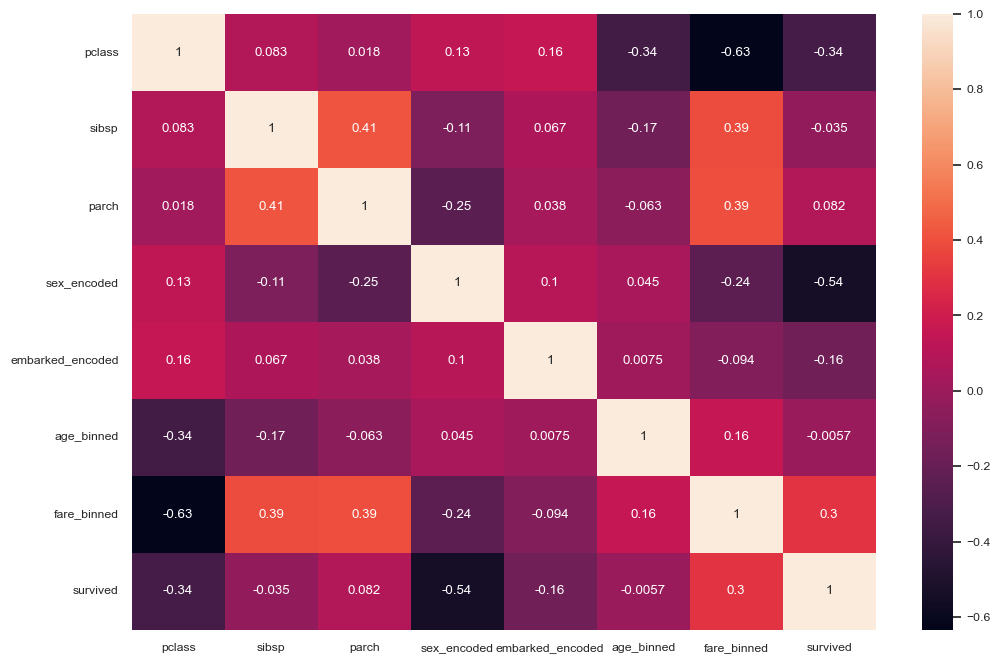

In [14]:
## 상관관계 히트맨 확인

df_corr = df_combined.corr()

plt.figure(figsize=(12,8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=True)
plt.show()

In [15]:
# 원핫 인코더를 잡아서 진행

onehot_encoder =OneHotEncoder(sparse_output=False, drop='first')
X_encoded = onehot_encoder.fit_transform(X)
X_encoded

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [16]:
# 각 피처의 분산 계산

variances = np.var(X_encoded, axis=0)
variances

array([0.16386335, 0.24739224, 0.1795458 , 0.03043781, 0.01763488,
       0.0197939 , 0.00558018, 0.00779462, 0.11489631, 0.08172509,
       0.00558018, 0.00446918, 0.00558018, 0.00112107, 0.22821808,
       0.07895138, 0.20036756, 0.00223963, 0.22618503, 0.12855831,
       0.18423164, 0.18819949, 0.18707842, 0.18707842])

In [17]:
# 분산의 최대값과 최소값 확인

min_variance = np.min(variances)
max_variance = np.max(variances)

print(f"Min variance: {min_variance}")
print(f"Max variance: {max_variance}")

Min variance: 0.00112107482103741
Max variance: 0.2473922414064572


## Threshold 값 설정 (0.01)
- variance는 최소 값 0.00112107482103741부터 최대 값 0.2473922414064572로 구성 되어 있음
- 대부분의 Feature가 0.01 이상의 분산을 가지지만, 일부 Feature는 0.01 미만의 분산을 가짐
- 분산 값이 0.01 이하인 경우, 해당 Feature는 거의 모델에 영향을 미치지 않을 것으로 생각됨

In [18]:
## VarianceThreshold로 feature selection
from sklearn.feature_selection import VarianceThreshold

selector =VarianceThreshold(threshold=0.01)
X_high_variance =selector.fit_transform(X_encoded)

In [19]:
X_high_variance

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [20]:
# 선택된 피처의 마스크 (True는 선택된 피처)
selected_features_mask = selector.get_support()

# OneHotEncoder로 변환된 피처 이름 얻기
encoded_feature_names = onehot_encoder.get_feature_names_out()

# 선택된 피처 이름 출력
selected_features = encoded_feature_names[selected_features_mask]
print("선택된 피처들:", selected_features)

선택된 피처들: ['pclass_2' 'pclass_3' 'sibsp_1' 'sibsp_2' 'sibsp_3' 'sibsp_4' 'parch_1'
 'parch_2' 'sex_encoded_1' 'embarked_encoded_1' 'embarked_encoded_2'
 'age_binned_1' 'age_binned_2' 'age_binned_3' 'fare_binned_1'
 'fare_binned_2' 'fare_binned_3']


In [21]:
# 선택되지 않은 피처 이름 출력
deselected_features = encoded_feature_names[~selected_features_mask]
print("선택되지 않은 피처들:", deselected_features)

선택되지 않은 피처들: ['sibsp_5' 'sibsp_8' 'parch_3' 'parch_4' 'parch_5' 'parch_6'
 'embarked_encoded_3']


## 선택된 피처로 logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_high_variance, y, test_size=0.2, random_state=111)

In [24]:
# 모델 학습 (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7877094972067039
F1 Score: 0.6935483870967742
Confusion Matrix:
[[98 15]
 [23 43]]


## 전체 Feature와 비교

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=111)

In [26]:
# 모델 학습 (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7988826815642458
F1 Score: 0.7049180327868853
Confusion Matrix:
[[100  13]
 [ 23  43]]


## Threshold를 0.01로 설정한 결과
- 선택 feature 학습 accuracy와 F1 score 모두 전체 Feature에 비해 소폭 감소함

## Threshold 값을 줄여서 0.05로 설정

In [27]:
selector =VarianceThreshold(threshold=0.005)
X_high_variance =selector.fit_transform(X_encoded)

In [28]:
X_high_variance

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [29]:
#선택된 피처의 마스크 (True는 선택된 피처)
selected_features_mask = selector.get_support()

# OneHotEncoder로 변환된 피처 이름 얻기
encoded_feature_names = onehot_encoder.get_feature_names_out()

# 선택된 피처 이름 출력
selected_features = encoded_feature_names[selected_features_mask]
print("선택된 피처들:", selected_features)

선택된 피처들: ['pclass_2' 'pclass_3' 'sibsp_1' 'sibsp_2' 'sibsp_3' 'sibsp_4' 'sibsp_5'
 'sibsp_8' 'parch_1' 'parch_2' 'parch_3' 'parch_5' 'sex_encoded_1'
 'embarked_encoded_1' 'embarked_encoded_2' 'age_binned_1' 'age_binned_2'
 'age_binned_3' 'fare_binned_1' 'fare_binned_2' 'fare_binned_3']


In [30]:
# 선택되지 않은 피처 이름 출력
deselected_features = encoded_feature_names[~selected_features_mask]
print("선택되지 않은 피처들:", deselected_features)

선택되지 않은 피처들: ['parch_4' 'parch_6' 'embarked_encoded_3']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_high_variance, y, test_size=0.2, random_state=111)

In [32]:
# 모델 학습 (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 (Accuracy, F1 Score)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7988826815642458
F1 Score: 0.7049180327868853
Confusion Matrix:
[[100  13]
 [ 23  43]]


## Threshold를 0.01로 설정한 결과
- Accuracy와 F1 score 모두 전체 Feature로 학습한 것과 동일한 값이 나옴
- 적은 Input으로 같은 output을 냈기 때문에, 차원의 저주 문제와 학습 시간에서 이점을 얻을 수 있음
- Feature가 많은 Dataset에서는 더 큰 효과를 볼 수 있을 것이라 생각됨

### 임계값 기준을 몇으로 했는지? 
- 0.01
### 그 기준의 이유
- 해당 값을 기준으로 Feature selection을 진행했을 때, 전체 Feature를 사용한 것과 같은 Accuracy를 얻을 수 있었음
### 어떤 식으로 찾았는지!
- 분산의 분포를 살펴보고 Threshold 값을 조정하면서 Accuracy 값을 비교함

### 어떤 피처가 선택이 되었나
- Threshold 값을 0.01로 설정해서 Feature Selection을 진행한 결과 ['parch_4' 'parch_6' 'embarked_encoded_3']를 제외한
['pclass_2' 'pclass_3' 'sibsp_1' 'sibsp_2' 'sibsp_3' 'sibsp_4' 'sibsp_5'
'sibsp_8' 'parch_1' 'parch_2' 'parch_3' 'parch_5' 'sex_encoded_1' 
'embarked_encoded_1' 'embarked_encoded_2' 'age_binned_1' 'age_binned_2' 
'age_binned_3' 'fare_binned_1' 'fare_binned_2' 'fare_binned_3']
 다음과 같은 피처들이 선택 되었음